# Training

In [1]:
%%capture
%pip install -r requirements.txt

In [2]:
import numpy as np
import tensorflow as tf;
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from entanglement_witnesses import witnesses
import mlflow

2024-05-22 18:36:52.189859: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-22 18:36:52.217114: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-05-22 18:36:52.637880: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Parameters cells
WITNESS_NAME = "CHSH"

In [4]:
# Parameters
WITNESS_NAME = "ENTROPY"


In [5]:
mlflow.set_tracking_uri(
    "http://localhost:5000"
)

In [6]:
def get_model(name, data_file_path):

    data = np.load(data_file_path)
    simulated_states = data["states"]
    simulated_labels = data["labels"]

    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(simulated_states.shape[1],)),  # Adjust input shape based on your data
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    X_train, X_val, y_train, y_val = train_test_split(simulated_states, simulated_labels, test_size=0.2, random_state=42)
    history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

    # Start an MLflow run and log the model
    with mlflow.start_run() as run:
        # Log the model
        mlflow.tensorflow.log_model(model, "model")

        # Log parameters
        mlflow.log_param("witness", name)

        # Evaluate the model and log metrics
        loss, accuracy = model.evaluate(X_val, y_val)
        mlflow.log_metric("loss", loss)
        mlflow.log_metric("accuracy", accuracy)
        
        # Register the model
        model_name = "QuantumStateClassifier-" + name
        model_uri = f"runs:/{run.info.run_id}/model"
        mlflow.register_model(model_uri, model_name)
        print(f"Model saved in run {run.info.run_id}")

    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model {} Accuracy'.format(name))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
    
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model {} Loss'.format(name))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    return model

Epoch 1/20


/home/faical/anaconda3/envs/quantum-entanglement/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-22 18:36:53.607013: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-22 18:36:53.629399: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentati

I0000 00:00:1716395814.222834  238692 service.cc:145] XLA service 0x726ef8003c00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1716395814.222857  238692 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 6GB Laptop GPU, Compute Capability 8.6
2024-05-22 18:36:54.235245: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-22 18:36:54.306174: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


  1/150 ━━━━━━━━━━━━━━━━━━━━ 2:48 1s/step - accuracy: 0.5625 - loss: 0.6801

105/150 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - accuracy: 0.6710 - loss: 0.6256

I0000 00:00:1716395814.887888  238692 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6773 - loss: 0.6104 - val_accuracy: 0.8408 - val_loss: 0.3999


Epoch 2/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7500 - loss: 0.4604

148/150 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - accuracy: 0.8864 - loss: 0.3167

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.8869 - loss: 0.3154 - val_accuracy: 0.9625 - val_loss: 0.1493


Epoch 3/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9375 - loss: 0.1524

134/150 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.9635 - loss: 0.1298

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.9638 - loss: 0.1281 - val_accuracy: 0.9658 - val_loss: 0.0838


Epoch 4/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0373

144/150 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - accuracy: 0.9728 - loss: 0.0792

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.9730 - loss: 0.0788 - val_accuracy: 0.9833 - val_loss: 0.0534


Epoch 5/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9688 - loss: 0.0585

132/150 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.9829 - loss: 0.0568

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.9832 - loss: 0.0559 - val_accuracy: 0.9883 - val_loss: 0.0405


Epoch 6/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0257

118/150 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.9872 - loss: 0.0411

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.9875 - loss: 0.0404 - val_accuracy: 0.9942 - val_loss: 0.0315


Epoch 7/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0159

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 337us/step - accuracy: 0.9907 - loss: 0.0287

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - accuracy: 0.9907 - loss: 0.0287 - val_accuracy: 0.9942 - val_loss: 0.0263


Epoch 8/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0080

140/150 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.9938 - loss: 0.0216

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.9937 - loss: 0.0217 - val_accuracy: 0.9958 - val_loss: 0.0231


Epoch 9/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0310

133/150 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.9952 - loss: 0.0214

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.9952 - loss: 0.0212 - val_accuracy: 0.9942 - val_loss: 0.0164


Epoch 10/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0077

123/150 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.9960 - loss: 0.0130

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.9960 - loss: 0.0134 - val_accuracy: 0.9975 - val_loss: 0.0147


Epoch 11/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0135

125/150 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.9971 - loss: 0.0123

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.9970 - loss: 0.0123 - val_accuracy: 0.9975 - val_loss: 0.0140


Epoch 12/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0107

131/150 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.9981 - loss: 0.0116

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.9980 - loss: 0.0115 - val_accuracy: 0.9967 - val_loss: 0.0124


Epoch 13/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 1.0000 - loss: 0.0016

118/150 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.9971 - loss: 0.0105

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.9971 - loss: 0.0103 - val_accuracy: 0.9975 - val_loss: 0.0084


Epoch 14/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0041

118/150 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.9991 - loss: 0.0061

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.9989 - loss: 0.0063 - val_accuracy: 0.9975 - val_loss: 0.0090


Epoch 15/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0034

127/150 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.9978 - loss: 0.0067

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 563us/step - accuracy: 0.9978 - loss: 0.0067 - val_accuracy: 0.9967 - val_loss: 0.0082


Epoch 16/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 1.0000 - loss: 0.0010

120/150 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.9978 - loss: 0.0065

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.9980 - loss: 0.0063 - val_accuracy: 0.9983 - val_loss: 0.0064


Epoch 17/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 8.9504e-04

124/150 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.9991 - loss: 0.0038   

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.9990 - loss: 0.0039 - val_accuracy: 0.9983 - val_loss: 0.0052


Epoch 18/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 0.0048

124/150 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 1.0000 - loss: 0.0032

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.9999 - loss: 0.0033 - val_accuracy: 0.9975 - val_loss: 0.0062


Epoch 19/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 8.3642e-04

142/150 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - accuracy: 0.9994 - loss: 0.0032   

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.9994 - loss: 0.0032 - val_accuracy: 0.9983 - val_loss: 0.0053


Epoch 20/20


  1/150 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 8.7028e-04

127/150 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 1.0000 - loss: 0.0020   

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.9983 - val_loss: 0.0043


2024/05/22 18:36:57 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


 1/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0015

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - accuracy: 0.9989 - loss: 0.0040


/home/faical/anaconda3/envs/quantum-entanglement/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Registered model 'QuantumStateClassifier-ENTROPY' already exists. Creating a new version of this model...
2024/05/22 18:36:59 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-ENTROPY, version 6


Model saved in run c79043a366734547859d05e9a750d11c


Created version '6' of model 'QuantumStateClassifier-ENTROPY'.


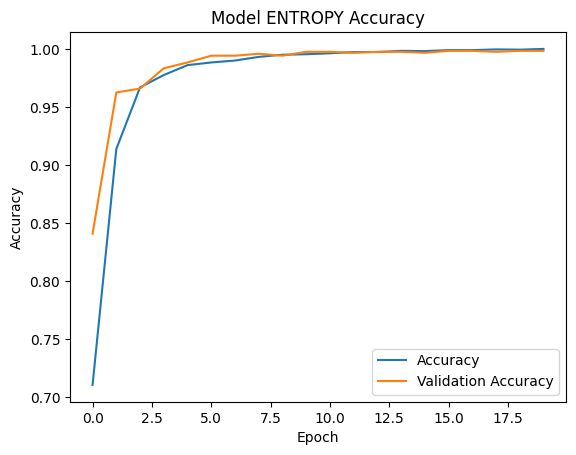

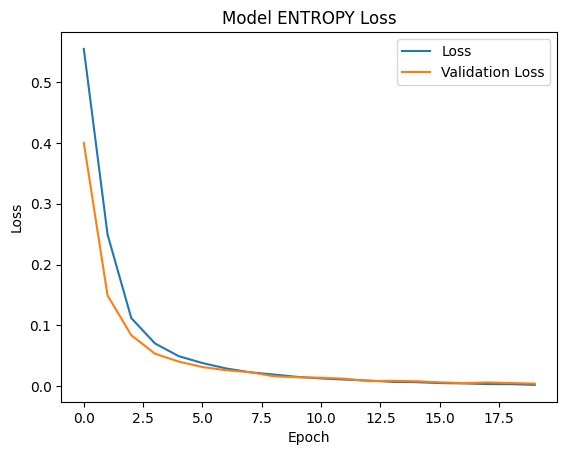

In [7]:
models = {}
parameter_witness = {WITNESS_NAME: witnesses[WITNESS_NAME]}

mlflow.set_experiment('ML Quantum entanglement')

for name, witness in parameter_witness.items():
    data_file_path = "./simulated_data/simulation-{}.npz".format(name)
    model = get_model(name, data_file_path)
    models[name] = {"model": model, "witness": witness}
